# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [5]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
df.shape

(1000000, 8)

In [9]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [11]:
df.value_counts()

distance_from_home  distance_from_last_transaction  ratio_to_median_purchase_price  repeat_retailer  used_chip  used_pin_number  online_order  fraud
0.004874            0.198102                        0.998148                        0.0              0.0        0.0              1.0           0.0      1
18.271839           0.558001                        0.161158                        1.0              0.0        0.0              1.0           0.0      1
18.271944           0.079844                        0.264669                        1.0              0.0        0.0              0.0           0.0      1
18.271993           1.078692                        0.712373                        1.0              0.0        0.0              1.0           0.0      1
18.272016           0.197228                        0.615863                        1.0              0.0        0.0              0.0           0.0      1
                                                                                 

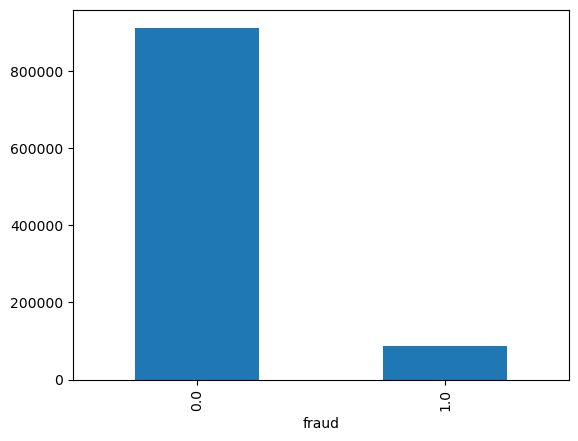

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [13]:
#1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

fraud_counts = df['fraud'].value_counts()
fraud_counts.plot(kind="bar")
plt.show()
print(fraud_counts)

In [15]:
#Absolutely—it’s highly imbalanced! 
#We have 91,2597 non-fraudulent cases and 87,403 fraudulent cases. That means fraud cases make up only about 8.74% of the dataset.
#When one class (here, fraud = 1) is significantly lower in count than another (fraud = 0), it creates challenges for machine learning models.

In [17]:
#Preparing the data before modeling
df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']] = df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']].astype(int)
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [19]:
#2. Train a LogisticRegression
features = df.drop(columns = ["fraud"])
target = df["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
log_reg = LogisticRegression()

In [25]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
#3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [29]:
log_reg.score(X_test_scaled, y_test) #accuracy

0.958696

In [31]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    228151
           1       0.90      0.60      0.72     21849

    accuracy                           0.96    250000
   macro avg       0.93      0.79      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [33]:
# 0=legit - 1=fraud
#the model is performing quite well overall, but there are a few key insights to consider:

#High accuracy (0.96): This suggests the model is correctly classifying the majority of instances, 
#but accuracy alone isn't enough—especially if the classes are imbalanced.

#Precision (0.89 for class 1=fraud): This means that when the model predicts fraud (class 1=fraud), it is correct 89% of the time. 
#A high precision score is good because it means fewer false positives.

#Recall (0.60 for class 1): This is relatively low, meaning the model is only identifying 60% of actual fraud cases. 
#In fraud detection, recall is typically more important than precision, since missing fraudulent cases can have significant consequences.

#F1-score (0.72 for class 1): The harmonic mean of precision and recall shows that there is room for improvement in detecting fraud.

#Class imbalance: The support values show that non-fraud (class 0) is overwhelmingly more common than fraud (class 1). 
#This imbalance could be affecting recall for class 1.

In [35]:
from sklearn.metrics import confusion_matrix
log_reg_confusion_matrix = confusion_matrix(y_test, pred)  #Always Actual,Predicted
log_reg_confusion_matrix

array([[226645,   1506],
       [  8820,  13029]])

In [37]:
#Key Metrics:
#True Negatives (TN = 226,907): The model correctly identified non-fraud cases.
#False Positives (FP = 1,585): These are cases where the model incorrectly predicted fraud.
#False Negatives (FN = 8,526): Fraud cases that the model missed—this could be concerning in fraud detection.
#True Positives (TP = 12,982): The correctly identified fraud cases.

#the model is highly precise with non-fraud cases (Class 0), meaning it’s rarely misclassifying them.
#the false negative rate is high (8,526 fraud cases missed). This aligns with the low recall score for fraud you mentioned earlier (60% recall).

In [39]:
#4. Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?

train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1.477693,-0.181425,-0.396341,0.366471,1.360473,-0.334507,0.733406,0
1,-0.261103,-0.002228,-0.582743,0.366471,1.360473,-0.334507,0.733406,0
2,-0.228323,0.075435,-0.250495,0.366471,1.360473,-0.334507,0.733406,0
3,-0.312162,-0.175173,-0.636294,0.366471,-0.735038,-0.334507,-1.363501,0
4,-0.399892,-0.157666,0.185710,-2.728726,-0.735038,-0.334507,0.733406,0
...,...,...,...,...,...,...,...,...
749995,0.201834,-0.088263,-0.564221,0.366471,1.360473,-0.334507,0.733406,0
749996,-0.393882,-0.106701,-0.437184,-2.728726,-0.735038,2.989470,0.733406,0
749997,-0.277675,-0.112850,-0.339205,0.366471,-0.735038,-0.334507,0.733406,0
749998,-0.310513,-0.094339,-0.342937,0.366471,1.360473,-0.334507,0.733406,0


In [41]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [43]:
yes_df_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)
yes_df_oversampled.shape

(684446, 8)

In [45]:
train_over = pd.concat([yes_df_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
499268,2.334214,0.951899,-0.475373,0.366471,-0.735038,-0.334507,0.733406,1
488614,-0.314509,-0.112231,1.232700,0.366471,-0.735038,-0.334507,0.733406,1
526547,-0.290291,-0.132035,1.092781,0.366471,1.360473,-0.334507,0.733406,1
242272,-0.116203,-0.156950,1.158731,0.366471,-0.735038,-0.334507,0.733406,1
481671,4.128712,-0.163503,0.260307,0.366471,-0.735038,-0.334507,0.733406,1
...,...,...,...,...,...,...,...,...
749995,0.201834,-0.088263,-0.564221,0.366471,1.360473,-0.334507,0.733406,0
749996,-0.393882,-0.106701,-0.437184,-2.728726,-0.735038,2.989470,0.733406,0
749997,-0.277675,-0.112850,-0.339205,0.366471,-0.735038,-0.334507,0.733406,0
749998,-0.310513,-0.094339,-0.342937,0.366471,1.360473,-0.334507,0.733406,0


In [47]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [49]:
log_reg_over = LogisticRegression()
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [50]:
log_reg_over.score(X_test_scaled, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.934308

In [53]:
pred_over = log_reg_over.predict(X_test_scaled)
print(classification_report(y_pred = pred_over, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228151
           1       0.58      0.95      0.72     21849

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [55]:
# Generate classification reports as dictionaries
report_pred = classification_report(y_test, pred, output_dict=True)
report_pred_over = classification_report(y_test, pred_over, output_dict=True)

# Convert them into DataFrames
df_pred = pd.DataFrame(report_pred).T
df_pred_over = pd.DataFrame(report_pred_over).T

# Combine the two DataFrames for comparison
df_comparison = pd.concat([df_pred, df_pred_over], axis=1)

# Rename columns for clarity
df_comparison.columns = ['Precision (Original)', 'Recall (Original)', 'F1-score (Original)', 'Support (Original)',
                         'Precision (Oversampled)', 'Recall (Oversampled)', 'F1-score (Oversampled)', 'Support (Oversampled)']

# Display the comparison table
df_comparison


,Precision (Original),Recall (Original),F1-score (Original),Support (Original),Precision (Oversampled),Recall (Oversampled),F1-score (Oversampled),Support (Oversampled)
0,0.962542,0.993399,0.977727,228151.000000,0.994729,0.932961,0.962855,228151.000000
1,0.896388,0.596320,0.716194,21849.000000,0.575328,0.948373,0.716184,21849.000000
accuracy,0.958696,0.958696,0.958696,0.958696,0.934308,0.934308,0.934308,0.934308
macro avg,0.929465,0.794860,0.846961,250000.000000,0.785028,0.940667,0.839520,250000.000000
weighted avg,0.956761,0.958696,0.954870,250000.000000,0.958075,0.934308,0.941297,250000.000000


In [57]:
#Key Observations:
#Recall for fraud (class 1) increased from 0.60 to 0.95: A huge improvement! The model now catches significantly more fraudulent transactions.
#Precision for fraud (class 1) dropped from 0.89 to 0.57: This means more false positives—cases flagged as fraud that aren't actually fraud. 
#This is common when oversampling minority classes.
#Overall accuracy declined slightly (from 0.96 to 0.93): Since the model now prioritizes recall over precision, its overall accuracy has dropped.
#Macro average recall improved (from 0.80 to 0.94): A strong indication that recall is benefiting from oversampling.
#Weighted average F1-score slightly dropped: This suggests the model is sacrificing precision to improve recall.

In [59]:
#5. Run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [61]:
no_df_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_df_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
544269,-0.241687,-0.165817,-0.441834,0.366471,1.360473,-0.334507,0.733406,0
599844,-0.335143,1.045237,-0.203793,0.366471,1.360473,-0.334507,-1.363501,0
474391,0.897885,-0.174903,0.127074,0.366471,-0.735038,-0.334507,-1.363501,0
298559,-0.403459,-0.166747,-0.253227,-2.728726,1.360473,-0.334507,0.733406,0
567102,0.934567,0.592904,-0.270561,0.366471,1.360473,-0.334507,0.733406,0
...,...,...,...,...,...,...,...,...
264622,-0.337824,-0.178038,-0.265331,0.366471,-0.735038,-0.334507,-1.363501,0
541023,0.040020,-0.113075,0.143343,0.366471,-0.735038,-0.334507,0.733406,0
539515,-0.376204,-0.177678,-0.428403,0.366471,1.360473,-0.334507,0.733406,0
561172,-0.391696,0.211718,-0.152604,-2.728726,-0.735038,-0.334507,0.733406,0


In [63]:
train_under = pd.concat([no_df_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
544269,-0.241687,-0.165817,-0.441834,0.366471,1.360473,-0.334507,0.733406,0
599844,-0.335143,1.045237,-0.203793,0.366471,1.360473,-0.334507,-1.363501,0
474391,0.897885,-0.174903,0.127074,0.366471,-0.735038,-0.334507,-1.363501,0
298559,-0.403459,-0.166747,-0.253227,-2.728726,1.360473,-0.334507,0.733406,0
567102,0.934567,0.592904,-0.270561,0.366471,1.360473,-0.334507,0.733406,0
...,...,...,...,...,...,...,...,...
749950,-0.386267,-0.174276,0.853619,-2.728726,-0.735038,-0.334507,0.733406,1
749952,-0.261496,0.585606,1.225546,0.366471,-0.735038,-0.334507,0.733406,1
749969,-0.344225,6.120828,0.493844,0.366471,-0.735038,-0.334507,0.733406,1
749971,0.170666,-0.180236,1.371961,0.366471,1.360473,-0.334507,0.733406,1


In [65]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [67]:
log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_under, y_train_under)

LogisticRegression()

In [69]:
log_reg_under.score(X_test_scaled, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.933812

In [71]:
pred_under = log_reg_under.predict(X_test_scaled)
print(classification_report(y_pred = pred_under, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228151
           1       0.57      0.95      0.71     21849

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [73]:
# Generate classification reports as dictionaries
report_pred = classification_report(y_test, pred, output_dict=True)
report_pred_over = classification_report(y_test, pred_over, output_dict=True)
report_pred_under =classification_report(y_test, pred_under, output_dict=True)

# Convert them into DataFrames
df_pred = pd.DataFrame(report_pred).T
df_pred_over = pd.DataFrame(report_pred_over).T
df_pred_under = pd.DataFrame(report_pred_under).T

# Combine the two DataFrames for comparison
df_comparison = pd.concat([df_pred, df_pred_over, df_pred_under], axis=1)

# Rename columns for clarity
df_comparison.columns = ['Precision (Original)', 'Recall (Original)', 'F1-score (Original)', 'Support (Original)',
                         'Precision (Oversampled)', 'Recall (Oversampled)', 'F1-score (Oversampled)', 'Support (Oversampled)',
                         'Precision (Undersampled)', 'Recall (Undersampled)', 'F1-score (Undersampled)', 'Support (Undersampled)']

# Display the comparison table
df_comparison


,Precision (Original),Recall (Original),F1-score (Original),Support (Original),Precision (Oversampled),Recall (Oversampled),F1-score (Oversampled),Support (Oversampled),Precision (Undersampled),Recall (Undersampled),F1-score (Undersampled),Support (Undersampled)
0,0.962542,0.993399,0.977727,228151.000000,0.994729,0.932961,0.962855,228151.000000,0.994795,0.932352,0.962562,228151.000000
1,0.896388,0.596320,0.716194,21849.000000,0.575328,0.948373,0.716184,21849.000000,0.573293,0.949059,0.714800,21849.000000
accuracy,0.958696,0.958696,0.958696,0.958696,0.934308,0.934308,0.934308,0.934308,0.933812,0.933812,0.933812,0.933812
macro avg,0.929465,0.794860,0.846961,250000.000000,0.785028,0.940667,0.839520,250000.000000,0.784044,0.940706,0.838681,250000.000000
weighted avg,0.956761,0.958696,0.954870,250000.000000,0.958075,0.934308,0.941297,250000.000000,0.957957,0.933812,0.940908,250000.000000


In [75]:
#Key Observations
#Recall for fraud (Class 1) improved slightly from 0.9496 (Oversampled) to 0.9503 (Undersampled) → Very small improvement.
#Precision for fraud (Class 1) remained very low (from 0.5766 in Oversampling to 0.5783 in Undersampling) → Still many false positives.
#Overall accuracy stayed at around 0.9347, similar to oversampling.
#Macro average recall remained high, showing the model is still identifying more fraudulent cases effectively.
#Weighted F1-score improved very slightly, meaning undersampling might have balanced precision and recall just a little better than oversampling.

In [77]:
#6. Run SMOTE in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [85]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [87]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [89]:
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [91]:
log_reg_smote.score(X_test_scaled, y_test)

0.934216

In [93]:
pred_smote = log_reg_smote.predict(X_test_scaled)
print(classification_report(y_pred = pred_smote, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228151
           1       0.57      0.95      0.72     21849

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [95]:
# Generate classification reports as dictionaries
report_pred_over = classification_report(y_test, pred_over, output_dict=True)
report_pred_under =classification_report(y_test, pred_under, output_dict=True)
report_pred_smote =classification_report(y_test, pred_smote, output_dict=True)

# Convert them into DataFrames
df_pred_over = pd.DataFrame(report_pred_over).T
df_pred_under = pd.DataFrame(report_pred_under).T
df_pred_smote = pd.DataFrame(report_pred_smote).T

# Combine the two DataFrames for comparison
df_comparison = pd.concat([df_pred_over, df_pred_under,df_pred_smote], axis=1)

# Rename columns for clarity
df_comparison.columns = ['Precision (Oversampled)', 'Recall (Oversampled)', 'F1-score (Oversampled)', 'Support (Oversampled)',
                         'Precision (Undersampled)', 'Recall (Undersampled)', 'F1-score (Undersampled)', 'Support (Undersampled)',
                         'Precision (Smote)', 'Recall (Smote)', 'F1-score (Smote)', 'Support (Smote)',]

# Display the comparison table
df_comparison

,Precision (Oversampled),Recall (Oversampled),F1-score (Oversampled),Support (Oversampled),Precision (Undersampled),Recall (Undersampled),F1-score (Undersampled),Support (Undersampled),Precision (Smote),Recall (Smote),F1-score (Smote),Support (Smote)
0,0.994729,0.932961,0.962855,228151.000000,0.994795,0.932352,0.962562,228151.000000,0.994770,0.932821,0.962800,228151.000000
1,0.575328,0.948373,0.716184,21849.000000,0.573293,0.949059,0.714800,21849.000000,0.574923,0.948785,0.715988,21849.000000
accuracy,0.934308,0.934308,0.934308,0.934308,0.933812,0.933812,0.933812,0.933812,0.934216,0.934216,0.934216,0.934216
macro avg,0.785028,0.940667,0.839520,250000.000000,0.784044,0.940706,0.838681,250000.000000,0.784846,0.940803,0.839394,250000.000000
weighted avg,0.958075,0.934308,0.941297,250000.000000,0.957957,0.933812,0.940908,250000.000000,0.958077,0.934216,0.941229,250000.000000


In [100]:
#Key Observations
#Recall for fraud (Class 1) remains high (from 0.9483 in oversampling to 0.9487 in SMOTE). This means SMOTE still identifies most fraudulent cases.
#Precision for fraud (Class 1) stays low (from 0.5753 in oversampling to 0.5749 in SMOTE). So false positives are still an issue.
#Overall accuracy is almost unchanged (~0.9342 across methods).
#Macro average recall remains strong, meaning SMOTE ensures fraud cases aren't missed.
#Weighted F1-score is very close to other methods, showing no drastic improvement

In [106]:
#Looking at all of the sampling types
compare = pd.DataFrame({'y_test': y_test, 'Over':pred_over, 'Under':pred_under, 'Smote':pred_smote})
compare

,y_test,Over,Under,Smote
955820,0,0,0,0
614267,0,0,0,0
69645,0,0,0,0
736221,0,0,0,0
681858,0,0,0,0
...,...,...,...,...
288383,0,0,0,0
169380,0,0,0,0
339191,0,0,0,0
530781,0,0,0,0
